In [1]:
import argparse
from dataset.hico import build
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2

/opt/conda/envs/ofa/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser = argparse.ArgumentParser(description="hico")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/HICO-DET/", type=str)
args = parser.parse_args([])

In [3]:
def count_anno(mode='train', max_hoi=165, min_hoi=100):
    dataset = build(mode, args)
    actions = dataset.get_actions()
    COCO_CLASSES = dataset.COCO_CLASSES
    print(mode, len(dataset))
    left = list(range(max_hoi+1))
    height = [0]*(max_hoi+1)
    for i, (img, anno) in enumerate(tqdm(dataset, desc="Roading dataset")):
        hois = anno["hois"]
        hoi_num = len(hois)
        height[hoi_num] += 1
        if hoi_num < min_hoi:
            continue
        print(hoi_num)
        boxes = anno["boxes"]
        labels = anno["labels"]
        img = cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2BGR)
        for (hum_id, obj_id, hoi_id) in hois:
            hum_bb = boxes[hum_id]
            hum_label = labels[hum_id]
            hum_name = COCO_CLASSES[hum_label]
            
            obj_bb = boxes[obj_id]
            obj_label = labels[obj_id]
            obj_name = COCO_CLASSES[obj_label]
            
            hoi_name = actions[hoi_id]
            cv2.putText(
                img, 
                hoi_name, 
                (int(hum_bb[0])+2, int(hum_bb[1])+20),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                thickness=2,
                color=(0, 0, 255),
            )
            cv2.rectangle(
                img,
                (int(hum_bb[0]), int(hum_bb[1])),
                (int(hum_bb[2]), int(hum_bb[3])),
                (0, 0, 255),
                3
            )

            cv2.putText(
                img, 
                obj_name, 
                (int(obj_bb[0])+2, int(obj_bb[1])+20),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1,
                thickness=2,
                color=(0, 255, 0),
            )
            cv2.rectangle(
                img,
                (int(obj_bb[0]), int(obj_bb[1])),
                (int(obj_bb[2]), int(obj_bb[3])),
                (0, 255, 0),
                3
            )

            cv2.line(
                img,
                (int((hum_bb[0]+hum_bb[2])/2), int((hum_bb[1]+hum_bb[3])/2)),
                (int((obj_bb[0]+obj_bb[2])/2), int((obj_bb[1]+obj_bb[3])/2)),
                color=(255, 0, 0),
                thickness=2,
            )
            
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        
    fig = plt.figure(figsize=(20,2))
    plt.ylim(0, 20)
    plt.xlim(0, max_hoi)
    plt.bar(left, height, align="center", width=1.0)
    return left, height

val 9546


Roading dataset:  25%|██▍       | 2357/9546 [00:14<00:42, 170.06it/s]

161


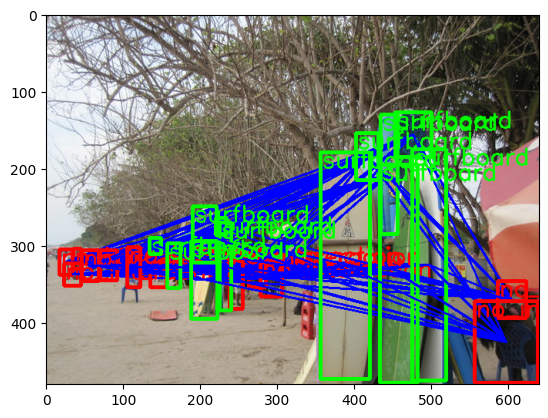

Roading dataset:  43%|████▎     | 4126/9546 [00:26<00:31, 169.48it/s]

156


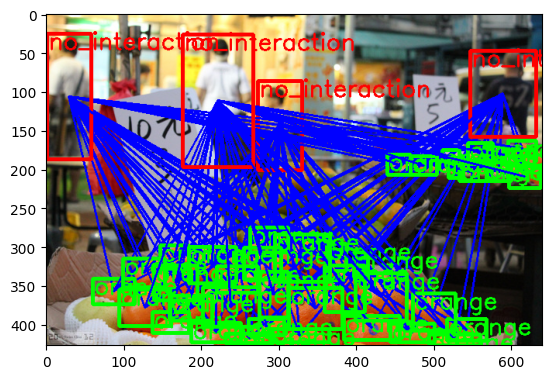

Roading dataset:  63%|██████▎   | 6003/9546 [00:38<00:24, 146.94it/s]

105


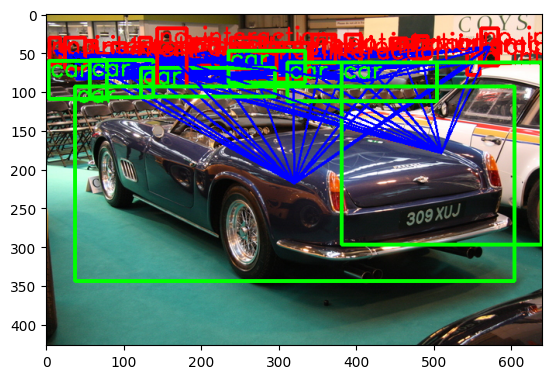

Roading dataset: 100%|██████████| 9546/9546 [00:59<00:00, 160.42it/s]


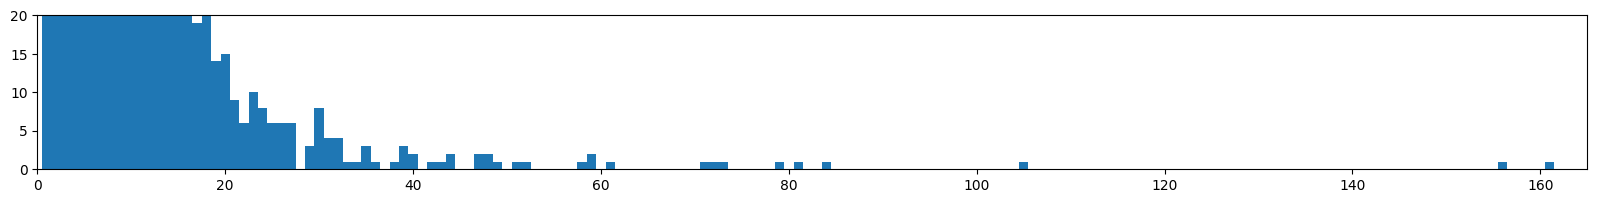

In [4]:
left, height = count_anno("val")

In [ ]:
left, height = count_anno("test")

In [ ]:
left, height = count_anno(max_hoi=260)